In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Ruta de la carpeta principal que contiene los datos
folder_path = '/content/drive/MyDrive/TFM/UJI_LIB_DB_v2.2/db/'

meses = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25"]
tst = ["02", "03", "04", "05"]

df_i = pd.DataFrame()
df_o = pd.DataFrame()
t_df_i = pd.DataFrame()
t_df_o = pd.DataFrame()

session = "01"


# Train
file_path = folder_path + session +  "/" + "trn01rss.csv"
df_i = pd.concat([df_i, pd.read_csv(file_path, header=None)], ignore_index=True)

file_path = folder_path + session +  "/" + "trn01crd.csv"
df_o = pd.concat([df_o, pd.read_csv(file_path, header=None)], ignore_index=True)

file_path = folder_path + session +  "/"+"trn01rss.csv"
df_i = pd.read_csv(file_path, header=None)

file_path = folder_path + session +  "/"+ "trn01crd.csv"
df_o = pd.read_csv(file_path, header=None)


# Test
file_path = folder_path + session +  "/"+ "tst01rss.csv"
t_df_i = pd.concat([t_df_i, pd.read_csv(file_path, header=None)], ignore_index=True)

file_path =folder_path + session +  "/"+"tst01crd.csv"
t_df_o = pd.concat([t_df_o, pd.read_csv(file_path, header=None)], ignore_index=True)

for rep in tst:

  file_path = folder_path + session +  "/" + "tst"+ rep +"rss.csv"
  t_df_i = pd.concat([t_df_i, pd.read_csv(file_path, header=None)], ignore_index=True)

  file_path =folder_path + session +  "/" + "tst"+ rep +"crd.csv"
  t_df_o = pd.concat([t_df_o, pd.read_csv(file_path, header=None)], ignore_index=True)



# Cambia los valores de la planta por metros. La planta 3 será 0 metros, la planta 5 serán 3.7 metros
df_o.iloc[:, 2] = df_o.iloc[:, 2].replace({3: 0, 5: 3.7})
# Igual para el de test
t_df_o.iloc[:, 2] = t_df_o.iloc[:, 2].replace({3: 0, 5: 3.7})





In [2]:
X_train = df_i
X_test = t_df_i
y_train = df_o
y_test = t_df_o

In [3]:
from sklearn.neighbors import NearestNeighbors
import time

start_train = time.time()
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(X_train, y_train)
end_train = time.time()

start_pred = time.time()
distances, indices = neigh.kneighbors(X_test)
end_pred = time.time()


errores=[]

for i in range(len(X_test)):
    errores_i = y_train.iloc[indices[i],:].mean(axis=0)
    distancia_euclidea = np.linalg.norm(y_test.iloc[i,:].values - errores_i.values)

    errores.append(distancia_euclidea)

media = np.mean(errores)
desv_est = np.std(errores)
minimo = np.min(errores)
maximo = np.max(errores)
tiempo_train = end_train - start_train
tiempo_prediccion = end_pred - start_pred

resultados = {
    "mes": [],
    "media": [],
    "desv_est": [],
    "minimo": [],
    "maximo": [],
    "tiempo_train": [],
    "tiempo_prediccion": []
}

# Almacenar resultados en el diccionario
resultados["mes"].append("01")
resultados["media"].append(media)
resultados["desv_est"].append(desv_est)
resultados["minimo"].append(minimo)
resultados["maximo"].append(maximo)
resultados["tiempo_train"].append(tiempo_train)
resultados["tiempo_prediccion"].append(tiempo_prediccion)


In [4]:
#DEFINITIVO

for session in range(1, len(meses)):
    mes = meses[session]
    df_i = pd.DataFrame()
    df_o = pd.DataFrame()
    t_df_i = pd.DataFrame()
    t_df_o = pd.DataFrame()

    # Train
    file_path = folder_path + mes + "/" + "trn01rss.csv"
    df_i = pd.concat([df_i, pd.read_csv(file_path, header=None)], ignore_index=True)

    file_path = folder_path + mes + "/" + "trn01crd.csv"
    df_o = pd.concat([df_o, pd.read_csv(file_path, header=None)], ignore_index=True)

    df_o.iloc[:, 2] = df_o.iloc[:, 2].replace({3: 0, 5: 3.7})


    # Calcular el número de filas a sustituir (5%)
    num_rows_to_replace = int(len(X_train) * 0.05)
    random_rows_indices = np.random.choice(len(X_train), num_rows_to_replace, replace=False)
    random_rows = X_train.iloc[random_rows_indices]

    for index, row in random_rows.iterrows():
        X_train.loc[index] = df_i.loc[index]
        y_train.loc[index] = df_o.loc[index]


    # Test
    file_path = folder_path + mes + "/" + "tst01rss.csv"
    t_df_i = pd.concat([t_df_i, pd.read_csv(file_path, header=None)], ignore_index=True)

    file_path = folder_path + mes + "/" + "tst01crd.csv"
    t_df_o = pd.concat([t_df_o, pd.read_csv(file_path, header=None)], ignore_index=True)

    X_test = t_df_i
    y_test = t_df_o

    for rep in tst:
        file_path = folder_path + mes + "/" + "tst" + rep + "rss.csv"
        t_df_i = pd.concat([t_df_i, pd.read_csv(file_path, header=None)], ignore_index=True)

        file_path = folder_path + mes + "/" + "tst" + rep + "crd.csv"
        t_df_o = pd.concat([t_df_o, pd.read_csv(file_path, header=None)], ignore_index=True)

    X_test = t_df_i
    y_test = t_df_o

    # kNN
    start_train = time.time()
    neigh.fit(X_train, y_train)
    end_train = time.time()

    start_pred = time.time()
    distances, indices = neigh.kneighbors(X_test)
    end_pred = time.time()

    errores = []

    for i in range(len(X_test)):
        errores_i = y_train.iloc[indices[i], :].mean(axis=0)
        distancia_euclidea = np.linalg.norm(y_test.iloc[i, :].values - errores_i.values)
        errores.append(distancia_euclidea)

    media = np.mean(errores)
    desv_est = np.std(errores)
    minimo = np.min(errores)
    maximo = np.max(errores)
    tiempo_train = end_train - start_train
    tiempo_prediccion = end_pred - start_pred

    # Almacenar resultados en el diccionario
    resultados["mes"].append(mes)
    resultados["media"].append(media)
    resultados["desv_est"].append(desv_est)
    resultados["minimo"].append(minimo)
    resultados["maximo"].append(maximo)
    resultados["tiempo_train"].append(tiempo_train)
    resultados["tiempo_prediccion"].append(tiempo_prediccion)

# Convertir resultados a DataFrame
resultados_df = pd.DataFrame(resultados)




+-----+--------------------+--------------------+--------------------+--------------------+-----------------------+---------------------+
| mes |       media        |      desv_est      |       minimo       |       maximo       |     tiempo_train      |  tiempo_prediccion  |
+-----+--------------------+--------------------+--------------------+--------------------+-----------------------+---------------------+
| 01  | 3.2807044567374177 | 2.0052691660492665 |        0.0         | 11.828086446324594 | 0.013361454010009766  | 0.3862597942352295  |
| 02  | 4.040575759351976  | 1.626806680858373  | 1.2999999999999994 | 11.398215038099655 |  0.03595471382141113  | 0.47171449661254883 |
| 03  | 4.101624588082102  | 1.6966074641630107 | 1.2999999999999994 | 11.60839888170846  | 0.006704807281494141  | 0.12589383125305176 |
| 04  | 3.937981659925008  | 1.5822013309032616 | 0.7998136108007291 | 11.422483671287207 |  0.00668787956237793  | 0.1252124309539795  |
| 05  | 3.958386583284943  | 1.633

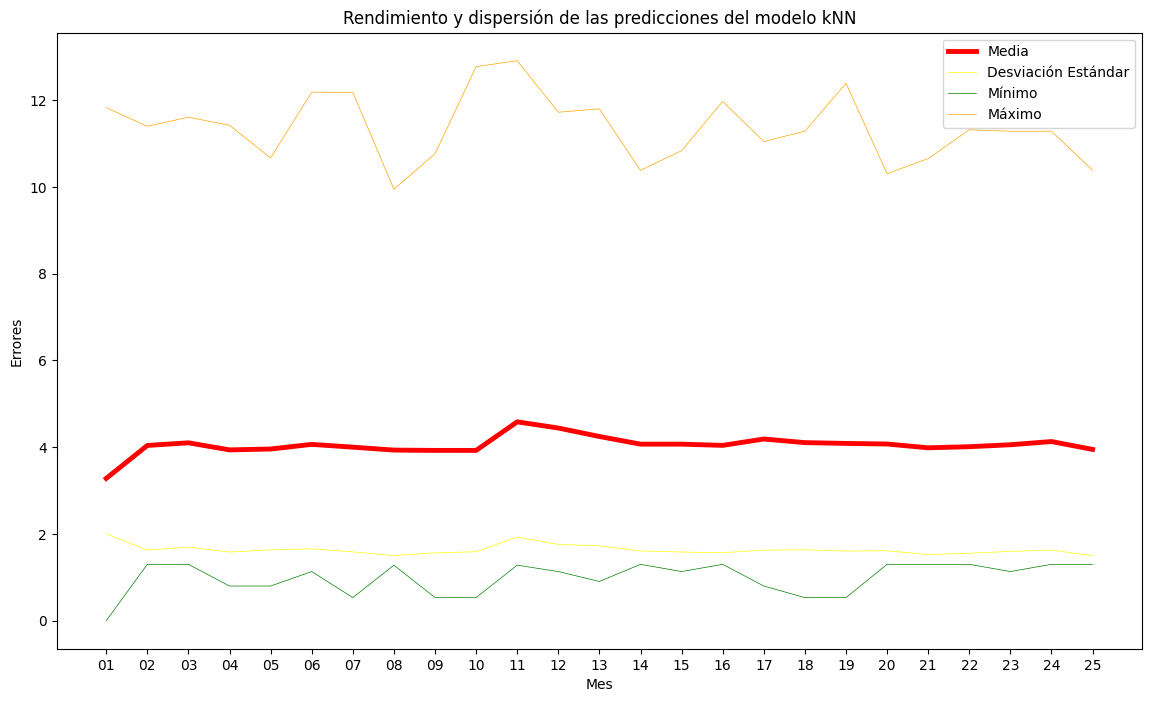

In [5]:
# Graficar los resultados

import matplotlib.pyplot as plt
from tabulate import tabulate


# Tabulado del DataFr
# Mostrar la tabla de resultados

print(tabulate(resultados_df, headers='keys', tablefmt='pretty', showindex=False, floatfmt=(".0f", ".5f", ".5f", ".5f", ".5f", ".5f", ".5f")))


plt.figure(figsize=(14, 8))
plt.plot(resultados_df["mes"], resultados_df["media"], label='Media', color='red', linewidth=3.5, linestyle='-')
plt.plot(resultados_df["mes"], resultados_df["desv_est"], label='Desviación Estándar', linewidth=0.5, color='yellow')
plt.plot(resultados_df["mes"], resultados_df["minimo"], label='Mínimo', color='green', linewidth=0.5)
plt.plot(resultados_df["mes"], resultados_df["maximo"], label='Máximo', color='orange', linewidth=0.5)

plt.xlabel('Mes')
plt.ylabel('Errores')
plt.title('Rendimiento y dispersión de las predicciones del modelo kNN')
plt.legend()
plt.show()